# AirBnb Listing Analysis

## Objective 1: Data Prep & QA

- Read in the AirBnb listings Data (use Low_memory= False and encoding="ISO-8859-1 in read_csv)
- Cast any date columns as a datetime format.
- Filter down the data to just lisitngs in the city of Paris
- QA the Paris lisitng data: check for missing values, and calculate the minimum, maximum, and average for each numeric field. 

#### 1. Import/Open the Listings.csv file

In [8]:
import pandas as pd

listings = pd.read_csv("Listings.csv", encoding="ISO-8859-1", low_memory = False)

In [9]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

#### 2.Cast any date columns as a datetime format

In [14]:
listings["host_since"] = pd.to_datetime(listings["host_since"])

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

#### 3.Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

In [21]:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price"]]
)

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


#### 4.QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [22]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [25]:
paris_listings.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [26]:
#try to find out how many values are zero

In [27]:
paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [ ]:
#As the null values are too low it will not affect our analysis, so we are going to ignore them. 

# Prepare the data for visualization

###  Produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

- Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)
- Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)
- Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count of rows representing the number of new hosts.

#### 1.Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean price (sorted low to high)

In [31]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price":"mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


#### 2.Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

In [39]:
paris_listings_accommodates =(
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean",})
    .sort_values("price")
)

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [40]:
paris_listings_over_time = (
   paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
    "neighbourhood": "count",
    "price": "mean"
    })
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


# Visualize the data and summarize findings

 - Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed
 - Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed
 - Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed
 - Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?
 - Create a dual axis line chart to show both new hosts and average price over time.


#### Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

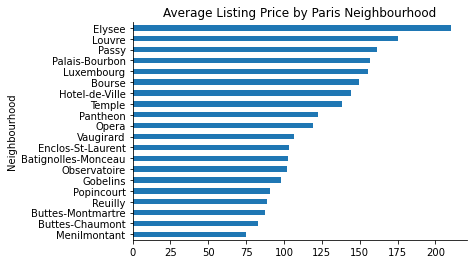

In [72]:
import seaborn as sns

(paris_listings_neighbourhood
.plot
.barh(
    title="Average Listing Price by Paris Neighbourhood",
    ylabel="Price Per Night (Euros)",
    xlabel="Neighbourhood",
    legend=None
 )
)

sns.despine()

#### 1.Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

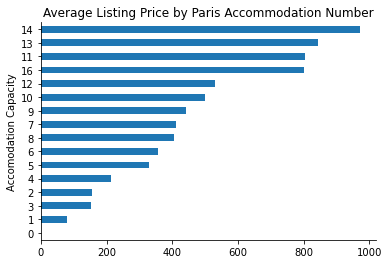

In [74]:
import seaborn as sns

(paris_listings_accommodates
.plot
.barh(
    title="Average Listing Price by Paris Accommodation Number",
    ylabel="Price Per Night (Euros)",
    xlabel="Accomodation Capacity",
    legend=None
 )
)

sns.despine()

#### 2.Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

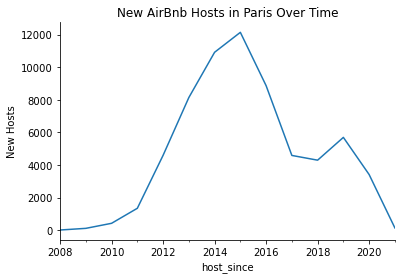

In [76]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnb Hosts in Paris Over Time"
)

sns.despine()

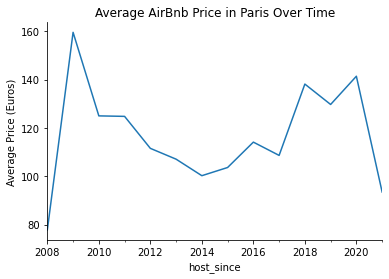

In [77]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnb Price in Paris Over Time"
)

sns.despine()

#### From the above data we can see after the 2015 regulation new listing go significantly down and price was initially higher but when AirBnb got popular new lisitng increases which brought down the prices and after regulation it's started to go up. 

#### 5.Create a dual axis line chart to show both new hosts and average price over time

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

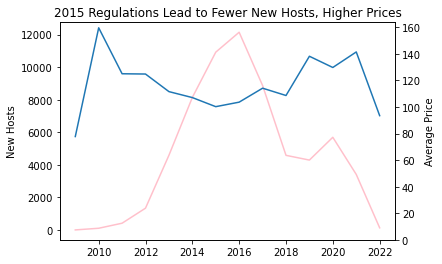

In [83]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price",
)

ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")